In [1]:
# Pandas y otros
import pandas as pd
import numpy as np

In [2]:
# Mathplotlib
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16.0, 6.0)

<AxesSubplot:>

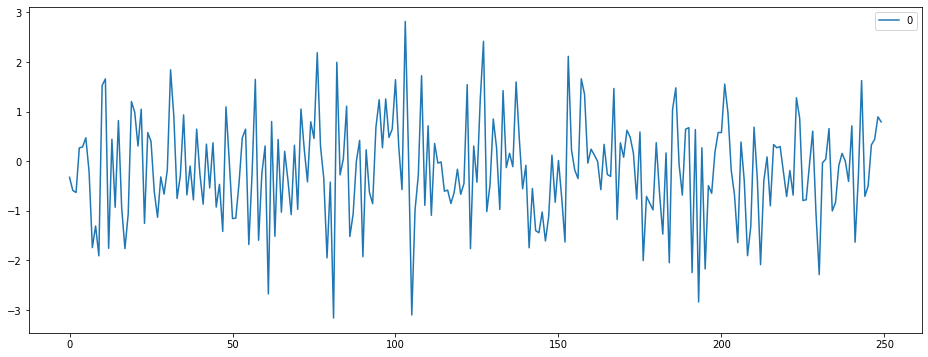

In [3]:
data = pd.DataFrame(np.random.randn(250))
data.plot()

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

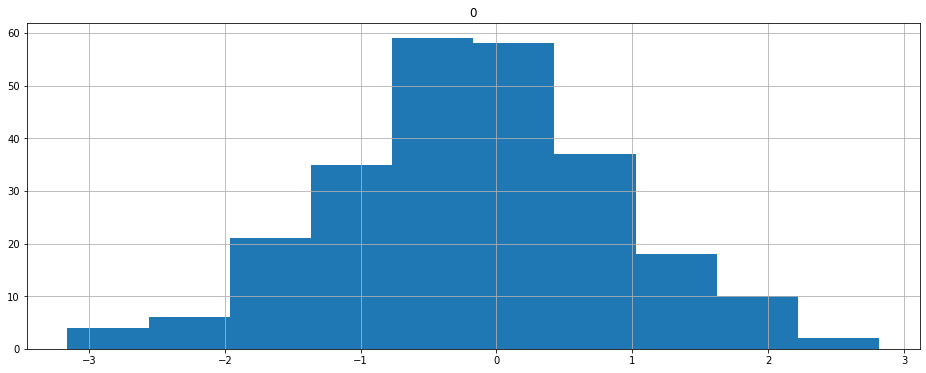

In [4]:
data.hist()

In [5]:
data.std()

0    1.028558
dtype: float64

In [6]:
data.mean()

0   -0.165239
dtype: float64

<AxesSubplot:>

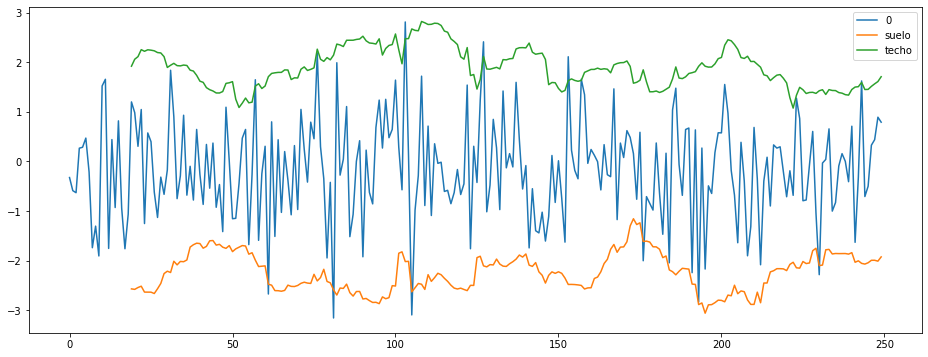

In [7]:
wind = 20
sigma = 2

#data["mean"] = data[0].rolling(window=wind).mean()
#data["deviacion"] = data[0].rolling(window=wind).std()
data["suelo"] = data[0].rolling(window=wind)\
    .mean() - (sigma * data[0].rolling(window=wind).std())
data["techo"] = data[0].rolling(window=wind)\
    .mean() + (sigma * data[0].rolling(window=wind).std())
data.plot()

In [8]:
data

,0,suelo,techo
0,-0.324023,NaN,NaN
1,-0.588682,NaN,NaN
2,-0.630070,NaN,NaN
3,0.268414,NaN,NaN
4,0.287359,NaN,NaN
...,...,...,...
245,-0.499275,-2.043885,1.455217
246,0.329223,-1.994260,1.516214
247,0.440188,-1.993688,1.566833
248,0.893720,-2.011517,1.613381


In [9]:
data["anom"] = data.apply(
    lambda row: row[0] if (row[0]<=row["suelo"] or row[0]>=row["techo"]) else 0, axis=1)

<AxesSubplot:>

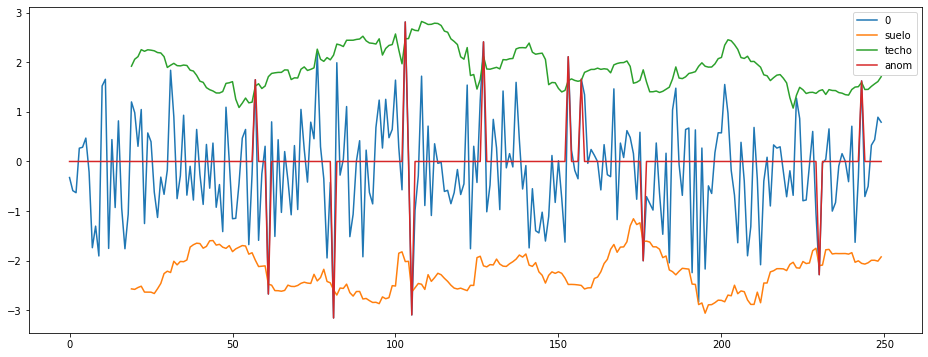

In [10]:
data.plot()

# Probando con datos reales

Query SQL de BigQuery
https://cloud.google.com/bigquery/public-data/github


```
SELECT
  COUNT(*) AS count,
  date(committer.date) AS date
FROM
  [bigquery-public-data:github_repos.commits]
WHERE 
  committer.date  > '2014-01-01 00:00'
  AND committer.date < '2018-01-01 00:00'
GROUP BY
  date
ORDER BY
  date ASC
    
```
    
github_commits_2014_2018.csv

In [11]:
data = pd.read_csv("github_commits_2014_2018.csv", index_col=1 )
data.head()

,count
date,
2014-01-01,33141
2014-01-02,58431
2014-01-03,61279
2014-01-04,45714
2014-01-05,46093


<AxesSubplot:xlabel='date'>

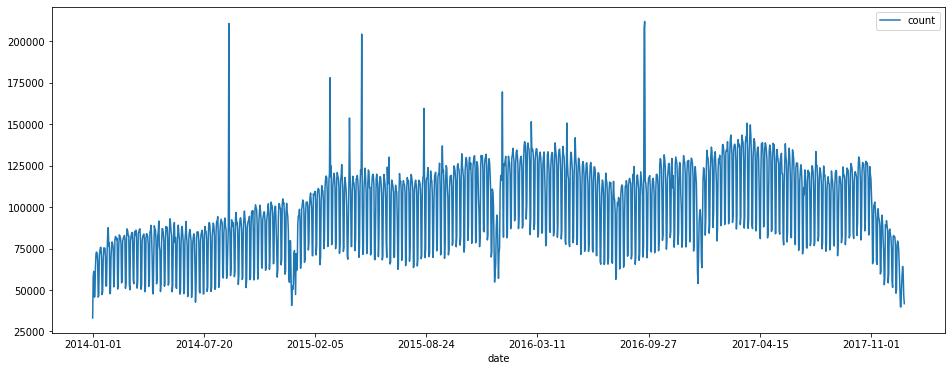

In [12]:
data.plot()

<AxesSubplot:xlabel='date'>

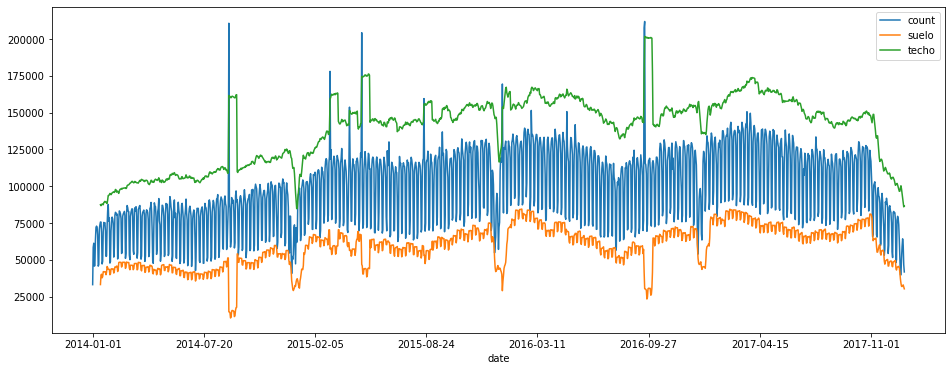

In [13]:
wind = 15
sigma = 2

data["suelo"] = data["count"].rolling(window=wind)\
    .mean() - (sigma * data["count"].rolling(window=wind).std())
data["techo"] = data["count"].rolling(window=wind)\
    .mean() + (sigma * data["count"].rolling(window=wind).std())
data.plot()

<AxesSubplot:xlabel='date'>

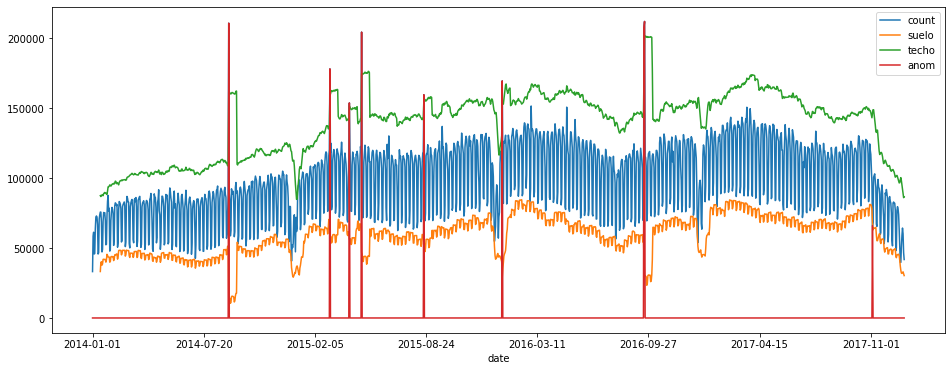

In [14]:
data["anom"] = data.apply(
    lambda row: row["count"] if (row["count"]<=row["suelo"] or row["count"]>=row["techo"]) else 0
, axis=1)
data.plot()

In [15]:
# Del mismo modo podemos cambiar el límite de filas
pd.options.display.max_rows = 20
data.columns.tolist()


['count', 'suelo', 'techo', 'anom']

In [16]:
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', 1000) 
pd.set_option('display.colheader_justify', 'center') 
pd.set_option('display.precision', 2) 
display(data)

,count,suelo,techo,anom
date,,,,
2014-01-01,33141,NaN,NaN,0.0
2014-01-02,58431,NaN,NaN,0.0
2014-01-03,61279,NaN,NaN,0.0
2014-01-04,45714,NaN,NaN,0.0
2014-01-05,46093,NaN,NaN,0.0
2014-01-06,63649,NaN,NaN,0.0
2014-01-07,72053,NaN,NaN,0.0
2014-01-08,72890,NaN,NaN,0.0
2014-01-09,72184,NaN,NaN,0.0
